In [1]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

lr for SGD

In [3]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"

train_losses_lr = {}
train_accuracies_lr = {}
val_losses_lr = {}
val_accuracies_lr = {}
test_accuracies_lr = {}

for lr in [1e-4, 1e-3, 5e-3, 1e-2, 5e-2]:
    print(f"Training for lr={lr}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_lr[lr] = train_losses
    train_accuracies_lr[lr] = train_accuracies
    val_losses_lr[lr] = val_losses
    val_accuracies_lr[lr] = val_accuracies

    test_accuracies_lr[lr] = evaluate_model(model, test_loader)

out_file_name = 'exp5_sgd_lr_1e-4_5e-2_t_100_bs_128_ep_10.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_lr, "train_accuracies": train_accuracies_lr, "val_losses": val_losses_lr, "val_accuracies": val_accuracies_lr, "test_accuracies": test_accuracies_lr}, f)


Training for lr=0.0001
Epoch 1/10, Train Loss: 2.3237, Train Accuracy: 18.55%, Val Loss: 2.2491, Val Accuracy: 24.30%, Time: 35.23s
Epoch 2/10, Train Loss: 2.0622, Train Accuracy: 28.73%, Val Loss: 1.9578, Val Accuracy: 31.23%, Time: 34.35s
Epoch 3/10, Train Loss: 1.8766, Train Accuracy: 31.86%, Val Loss: 2.1133, Val Accuracy: 28.32%, Time: 31.91s
Epoch 4/10, Train Loss: 1.8201, Train Accuracy: 32.82%, Val Loss: 1.9294, Val Accuracy: 30.16%, Time: 34.95s
Epoch 5/10, Train Loss: 1.7986, Train Accuracy: 33.36%, Val Loss: 2.0390, Val Accuracy: 29.14%, Time: 35.49s
Epoch 6/10, Train Loss: 1.7710, Train Accuracy: 33.71%, Val Loss: 2.2475, Val Accuracy: 27.81%, Time: 34.62s
Epoch 7/10, Train Loss: 1.7544, Train Accuracy: 34.01%, Val Loss: 1.7845, Val Accuracy: 33.46%, Time: 34.98s
Epoch 8/10, Train Loss: 1.7436, Train Accuracy: 34.53%, Val Loss: 1.8056, Val Accuracy: 33.03%, Time: 35.72s
Epoch 9/10, Train Loss: 1.7277, Train Accuracy: 35.01%, Val Loss: 2.0384, Val Accuracy: 29.72%, Time: 35.

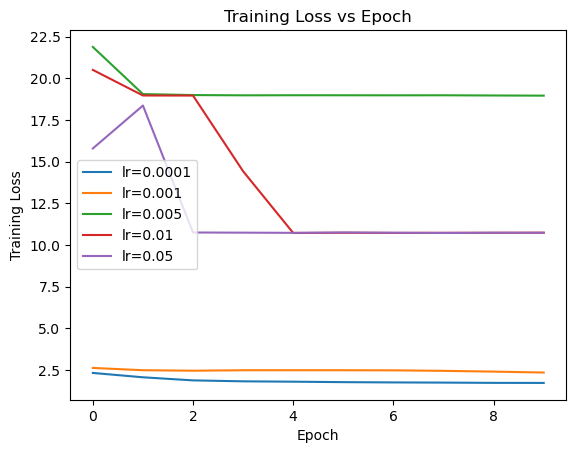

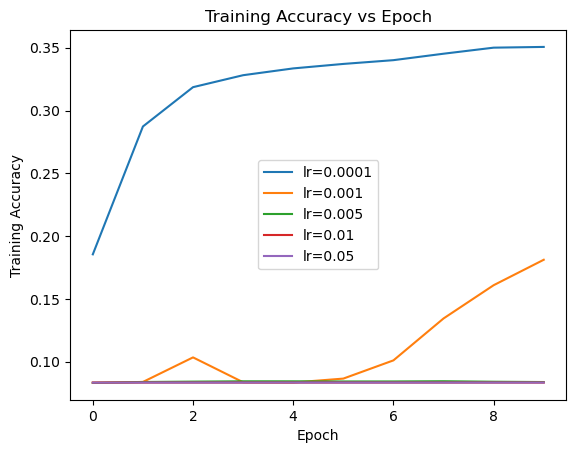

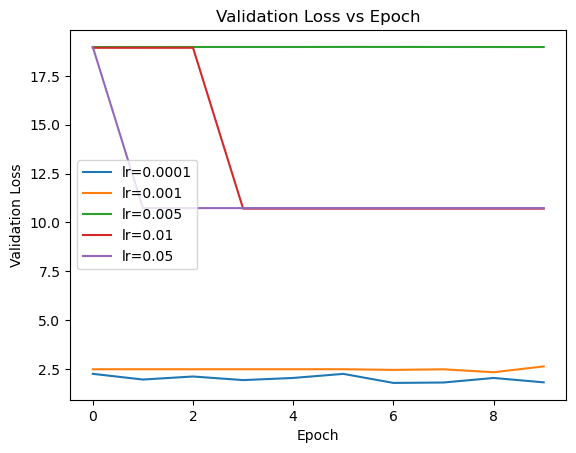

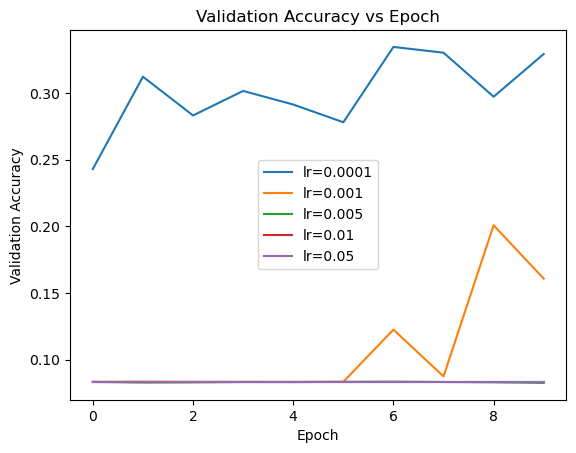

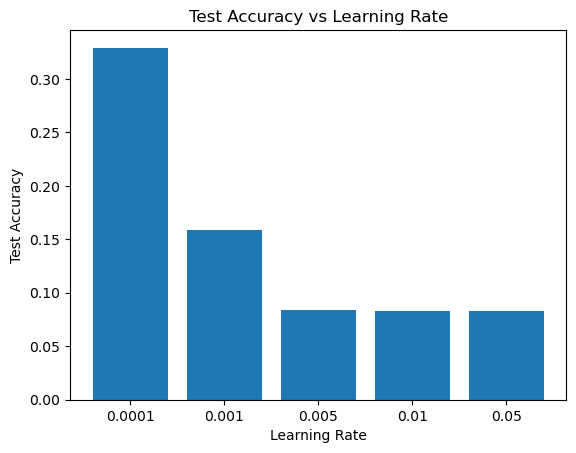

In [4]:
# Plotting
plt.figure()
for lr in train_losses_lr.keys():
    plt.plot(train_losses_lr[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss vs Epoch")
    plt.legend()

plt.figure()
for lr in train_accuracies_lr.keys():
    plt.plot(train_accuracies_lr[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.title("Training Accuracy vs Epoch")
    plt.legend()

plt.figure()
for lr in val_losses_lr.keys():
    plt.plot(val_losses_lr[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.title("Validation Loss vs Epoch")
    plt.legend()

plt.figure()
for lr in val_accuracies_lr.keys():
    plt.plot(val_accuracies_lr[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy vs Epoch")
    plt.legend()

plt.figure()
plt.bar([str(x) for x in test_accuracies_lr.keys()], test_accuracies_lr.values())
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Learning Rate")
plt.show()